tensor([[[[-0.0591,  0.0380,  0.5794,  ...,  0.7126,  0.5528,  0.4971],
          [-0.0924,  0.0543,  0.7530,  ...,  1.0492,  0.7520,  0.6059],
          [-0.0194,  0.2283,  0.9978,  ...,  1.5313,  0.9521,  0.6700],
          ...,
          [-0.0994, -0.2720,  0.0100,  ...,  0.4725,  0.3006,  0.2657],
          [ 0.0669,  0.0494,  0.4230,  ...,  0.1055, -0.0157,  0.0739],
          [ 0.2863,  0.2872,  0.4983,  ..., -0.0778, -0.0776,  0.1093]],

         [[ 0.4946,  0.7435,  1.2891,  ...,  1.3185,  0.7543,  0.5466],
          [ 0.3228,  0.6368,  1.4738,  ...,  1.4562,  0.7105,  0.5508],
          [-0.0654,  0.1585,  1.1650,  ...,  1.0143,  0.5242,  0.5847],
          ...,
          [-0.0765, -0.0286,  0.6324,  ...,  0.9413,  1.4955,  1.4213],
          [ 0.3828,  0.3876,  0.5984,  ...,  0.4545,  1.2720,  1.3237],
          [ 0.6395,  0.7025,  0.6919,  ...,  0.2632,  0.8635,  0.9508]],

         [[-0.2631, -0.4705, -0.7358,  ..., -1.1602, -0.6946, -0.1422],
          [-0.5594, -1.0800, -

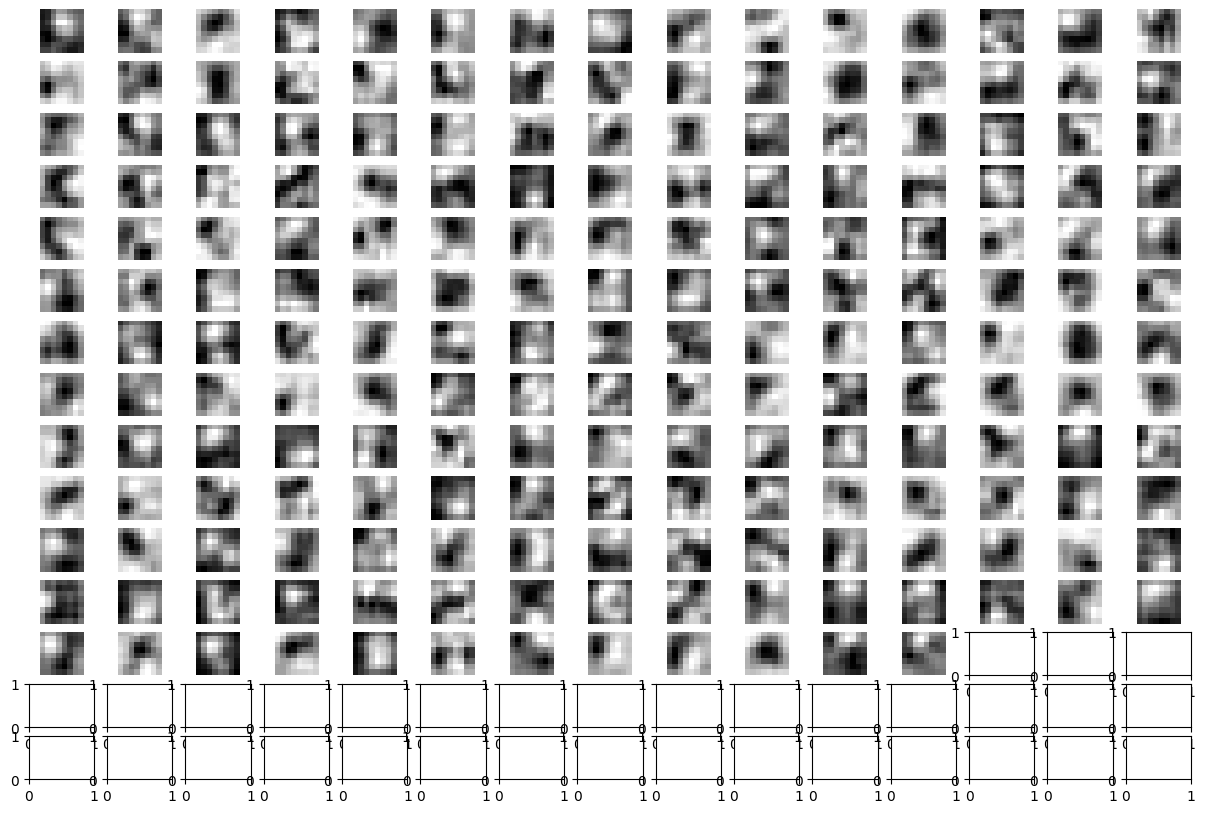

In [23]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.models.feature_extraction import get_graph_node_names
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv


class Inception_V3():
    def __init__(self, weights='ImageNet', last_layer_ind=-3):
        
        if weights == 'ImageNet':
            pretrained_model = models.inception_v3(pretrained=True)

        train_nodes, eval_nodes = get_graph_node_names(models.inception_v3())
        # print(eval_nodes)  # to find the name of the node
        return_nodes = {
            # node_name: user-specified key for output dict
            'Mixed_7c.branch_pool.bn': 'Last Layer'}
        

        #self.block = list(pretrained_model.children())[0]
        # self.layer_name = 'branch_pool'
        # print(list(pretrained_model.children())[-4])
        # self.layer = list(list(pretrained_model.children())[:-4])
         #self.layer = self.block[0:last_layer_ind]
        self.layer = create_feature_extractor(pretrained_model, return_nodes=return_nodes)
       
        
    def __str__(self):
        return 'inception_v3'
    
    def describe(self, image_path):
        # Requires image to be Pillow.

        # Load the image and apply the necessary transformations
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
                transforms.Resize(299),
                transforms.CenterCrop(299),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225])])
        image = transform(image)
        image = image.unsqueeze(0)  # Add batch dimension
        model = self.layer
        model.eval()
        with torch.no_grad():
                features = model(image)
                myFeatures = features['Last Layer']
        print(myFeatures)
        return myFeatures.squeeze()


if __name__ == "__main__":
    image_path = "C:/Users/hadil/Documents/projects/Machine Learning/project/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X/SOB_B_A-14-22549AB-40-001.png"
    pretrained_model = models.inception_v3(pretrained=True)

    pass

obj = Inception_V3('ImageNet',-3)
obj.describe(image_path)
features = obj.describe(image_path)

# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=15, ncols=15, figsize=(15, 10))

# Loop over the features and plot each one as an image in a subplot
for i in range(len(features)):
    row = i // 15
    col = i % 15
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()

In [2]:
print(pretrained_model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri